In [369]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA 
from sklearn.feature_selection import VarianceThreshold, RFECV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBClassifier
import multiprocessing
from joblib import Parallel, delayed
import miceforest as mf 
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/siddhant/Desktop/Sensors/archive/aps_failure_training_set.csv',na_values='na')

In [4]:
df.sample(5)

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
40892   neg   55134     0.0  2.130706e+09   304.0   204.0   132.0     0.0   
35603   neg     102     0.0  1.000000e+01     6.0     0.0     0.0     0.0   
20803   neg      18     0.0  2.400000e+01    14.0     2.0     2.0     0.0   
49807   neg  204558     NaN  1.504000e+03  1322.0     0.0     0.0     0.0   
28036   neg   60566     NaN  2.130706e+09   338.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002     ee_003     ee_004     ee_005  \
40892     0.0     0.0  ...        0.0        0.0        0.0        0.0   
35603     0.0     0.0  ...      478.0      138.0      532.0      476.0   
20803     0.0     0.0  ...       88.0       24.0       26.0       36.0   
49807     0.0     0.0  ...  2037018.0  1080688.0  2136712.0  1801198.0   
28036     0.0     0.0  ...   773956.0   348848.0   679572.0   533016.0   

          ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
40892        0.0       0.0       0.0      0.0     0.0     0.0  
35603      336.0    2036.0       0.0      0.0     0.0     0.0  
20803       62.0     104.0       0.0      0.0     0.0     0.0  
49807  1183296.0  527126.0  575470.0  22844.0     0.0     0.0  
28036   351838.0  127098.0    9590.0      0.0     0.0     0.0  

[5 rows x 171 columns]

In [5]:
df.shape

(60000, 171)

In [6]:
df.describe()

aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.503220e+05  7.617312e+05   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    20070.000000  3.376892e+06  4.109372e+06  1.055286e+07  6.340207e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean   ...  4.454897e+05  2.111264e+05  4.457343e+05  3.939462e+05   
std    ...  1.155540e+06  5.433188e+05  1.168314e+06  1.121044e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.936000e+03  1.166000e+03  2.700000e+03  3.584000e+03   
50%    ...  2.337960e+05  1.120860e+05  2.215180e+05  1.899880e+05   
75%    ...  4.383960e+05  2.182320e+05  4.666140e+05  4.032220e+05   
max    ...  7.793393e+07  3.775839e+07  9.715238e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04  57276.000000   
mean   3.330582e+05  3.462714e+05  1.387300e+05  8.388915e+03      0.090579   
std    1.069160e+06  1.728056e+06  4.495100e+05  4.747043e+04      4.368855   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.120000e+02  1.100000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    9.243200e+04  4.109800e+04  3.812000e+03  0.000000e+00      0.000000   
75%    2.750940e+05  1.678140e+05  1.397240e+05  2.028000e+03      0.000000   
max    3.160781e+07  1.195801e+08  1.926740e+07  3.810078e+06    482.000000   

             eg_000  
count  57277.000000  
mean       0.212756  
std        8.830641  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1146.000000  

[8 rows x 170 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [8]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print(f"The dataset has {len(categorical)} categorical fetaures and {len(numerical)} numerical features")

The dataset has 1 categorical fetaures and 170 numerical features


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [11]:
missing_values = ((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False).to_frame()
missing_values.rename(columns={0:'% missing'},inplace=True)
missing_values

% missing
br_000  82.106667
bq_000  81.203333
bp_000  79.566667
bo_000  77.221667
ab_000  77.215000
...           ...
cj_000   0.563333
ci_000   0.563333
bt_000   0.278333
aa_000   0.000000
class    0.000000

[171 rows x 1 columns]

In [12]:
total_values = np.prod(df.shape)
total_missing = sum(df.isnull().sum())

total_missing_percentage = (total_missing/total_values) * 100

print(f'The total percentage of missing values in the dataset is {round(total_missing_percentage,2)}%')

The total percentage of missing values in the dataset is 8.28%


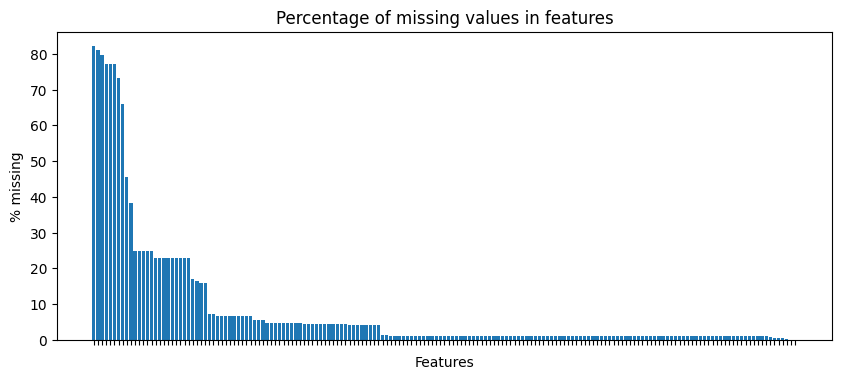

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(missing_values.index, missing_values['% missing'])
ax.set_ylabel('% missing')
ax.set_xlabel('Features')
ax.set_title('Percentage of missing values in features')
ax.set_xticklabels([])
plt.show()


In [14]:
# DISCARDING FEATURES WITH MORE THAN 75% MISSING VALUES
features_to_discard = missing_values[missing_values['% missing'] >= 75]
features_to_discard

% missing
br_000  82.106667
bq_000  81.203333
bp_000  79.566667
bo_000  77.221667
ab_000  77.215000
cr_000  77.215000

In [15]:
df = df[df.columns[~df.columns.isin(features_to_discard.index)]]
df.shape

(60000, 165)

In [16]:
revised_missing_values = (sum(df.isnull().sum())/np.prod(df.shape))*100
print(f"The total percentage of missing values in the dataset is {round(revised_missing_values,2)}%")

The total percentage of missing values in the dataset is 5.71%


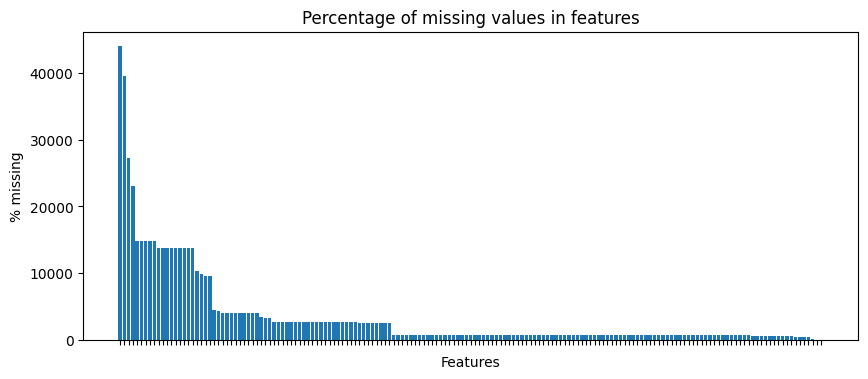

In [17]:
new_missing = df.isnull().sum().to_frame().sort_values(by=0, ascending=False)

new_missing.rename(columns={0:'% missing'},inplace=True)

fig, ax = plt.subplots(figsize=(10,4))

ax.bar(new_missing.index, new_missing['% missing'])
ax.set_ylabel('% missing')
ax.set_xlabel('Features')
ax.set_title('Percentage of missing values in features')
ax.set_xticklabels([])
ax.grid(False)
plt.show()


In [18]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [19]:
# MISSING VALUE IMPUTATION USING SIMPLE IMPUTER MOST FREQUENT
# x1 = df1.drop('class', axis=1)
# y1 = df1['class']

# y1 = [1 if i == 'pos' else 0 for i in y1]

# imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# x1 = imputer3.fit_transform(x1)

In [21]:
# MISSING VALUE IMPUTATION USING SIMPLE IMPUTER MEDIAN
# x3 = df3.drop('class', axis=1)
# y3 = df3['class']

# y3 = [1 if i == 'pos' else 0 for i in y3]

# imputer3 = SimpleImputer(missing_values=np.nan, strategy='median')
# x3 = imputer3.fit_transform(x3)

In [22]:
# MISSING VALUE IMPUTATION USING SIMPLE IMPUTER MEAN
# x4 = df4.drop('class', axis=1)
# y4 = df4['class']

# y4 = [1 if i == 'pos' else 0 for i in y4]

# imputer4 = SimpleImputer(missing_values=np.nan, strategy='mean')
# x4 = imputer4.fit_transform(x4)

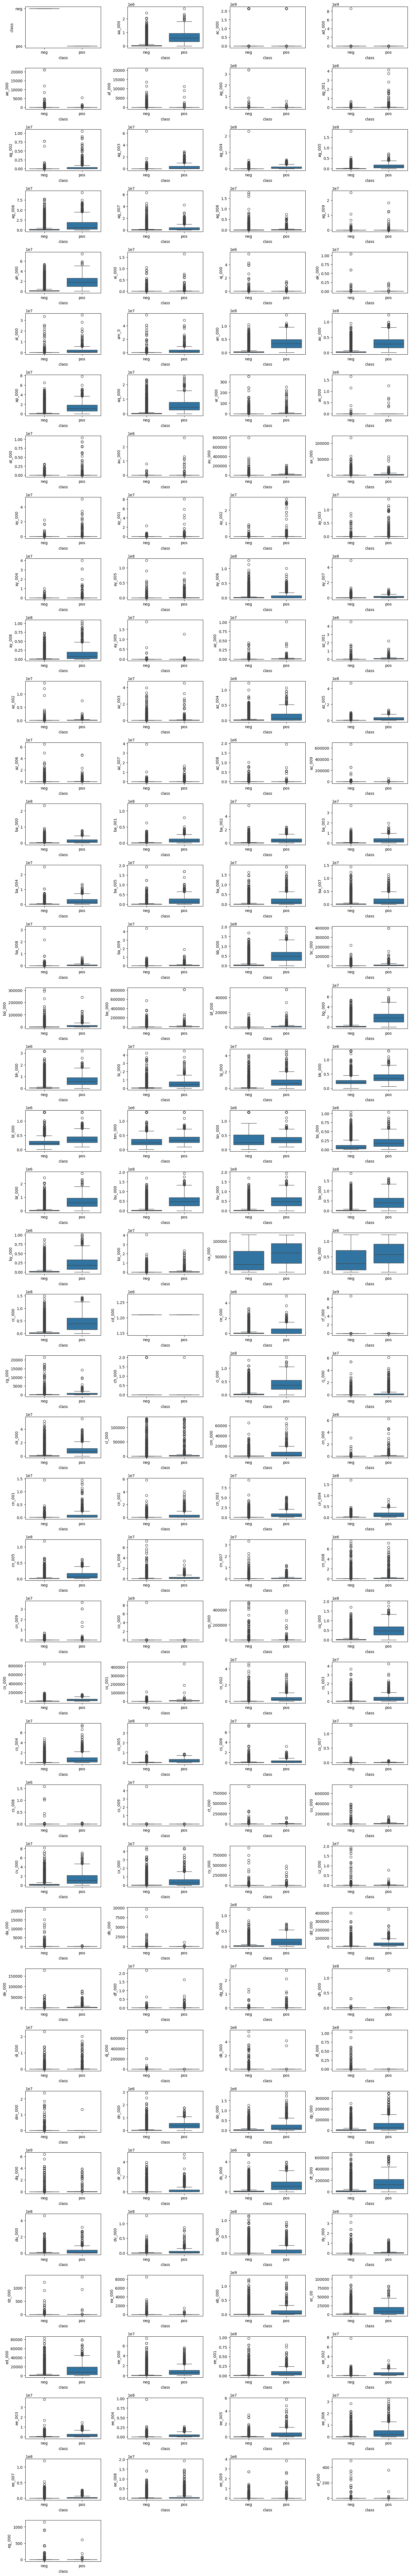

In [23]:
# CHECKING THE OUTLIERS OF THE DATA
fig, ax = plt.subplots(45, 4, figsize=(15, 100))
ax = ax.flatten()


for index, column in enumerate(df.columns):
    sns.boxplot(x='class', y=column, data=df, ax=ax[index])
    ax[index].grid(False)

for i in range(len(df.columns), len(ax)):
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

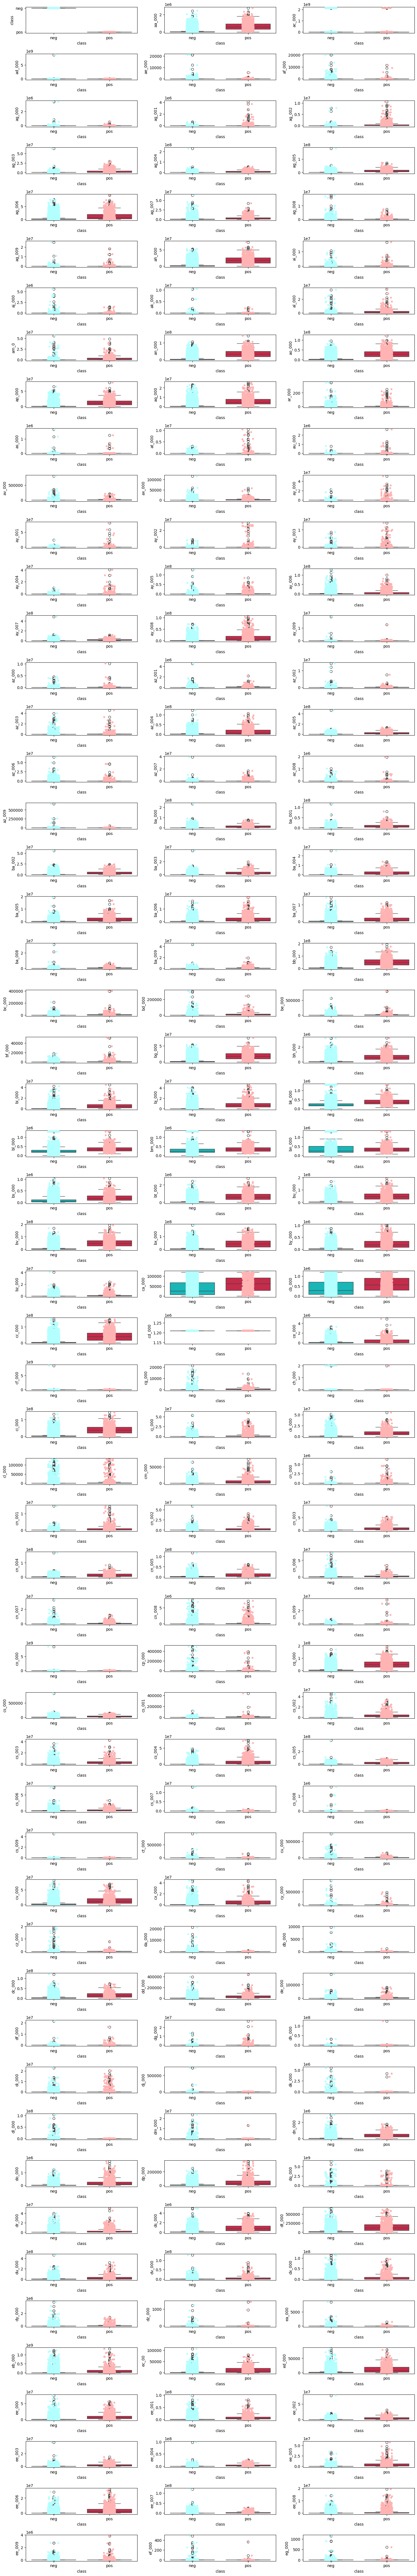

In [24]:
# SPREAD OF EACH NUMERICAL FRATURE FOR EACH CLASS
fig, ax = plt.subplots(60, 3, figsize=(15, 100))
ax = ax.flatten()

for index, column in enumerate(df.columns):
    sns.boxplot(x='class', y=column, data=df, ax=ax[index], palette=['#00CED1', '#DC143C'])
    sns.stripplot(x='class', y=column, data=df, ax=ax[index], palette=['#B3FFFF', '#FFB3B3'])
    ax[index].grid(False)

for i in range(len(df.columns), len(ax)):
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

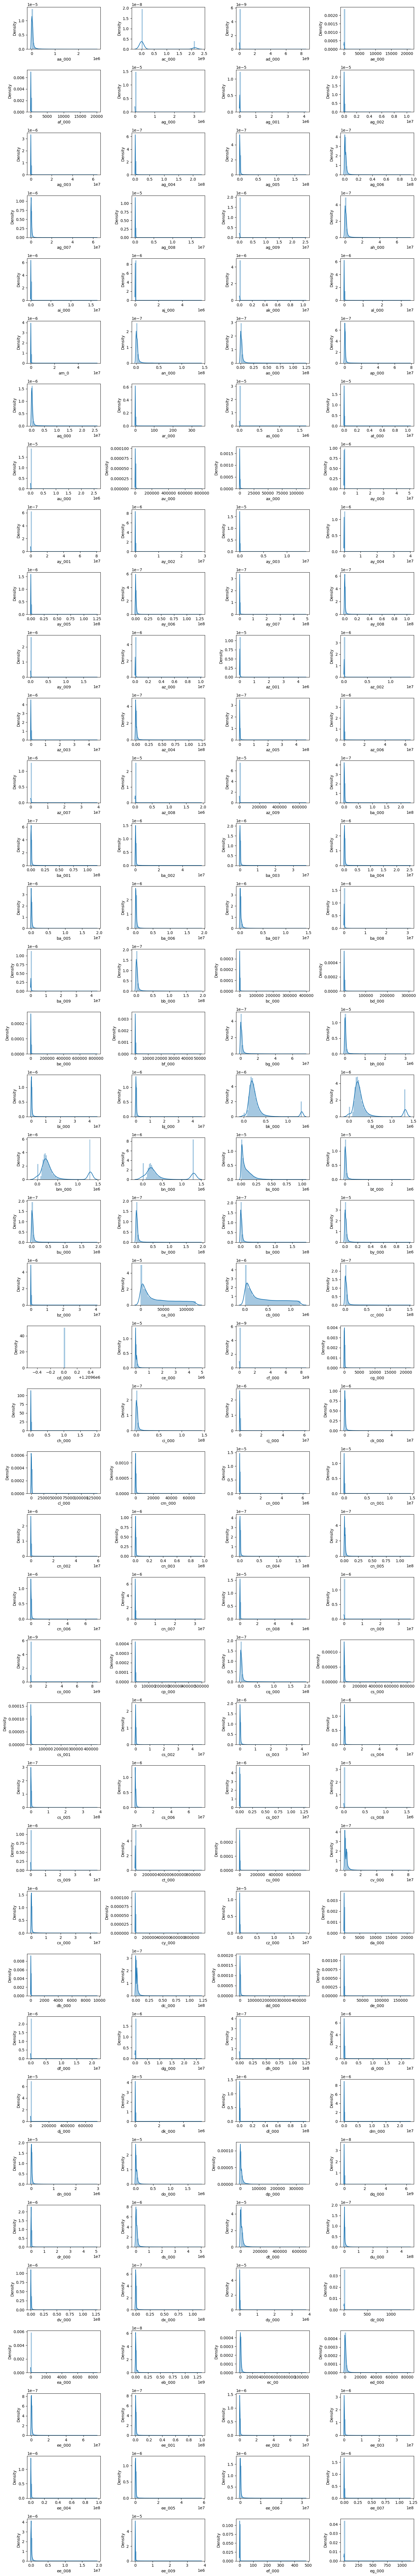

In [25]:
# DISTRIBUTION OF THE DATA
fig, ax = plt.subplots(45, 4, figsize=(15, 100))
ax = ax.flatten()

df_numerical = df.select_dtypes(exclude='object').columns

for index, feature in enumerate(df_numerical):
    sns.distplot(df[feature], ax=ax[index])
    ax[index].grid(False)

for i in range(len(df_numerical), len(ax)):
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

### SPLITTING THE DATA ADDRESSING IMBALANCED TARGET CLASSES

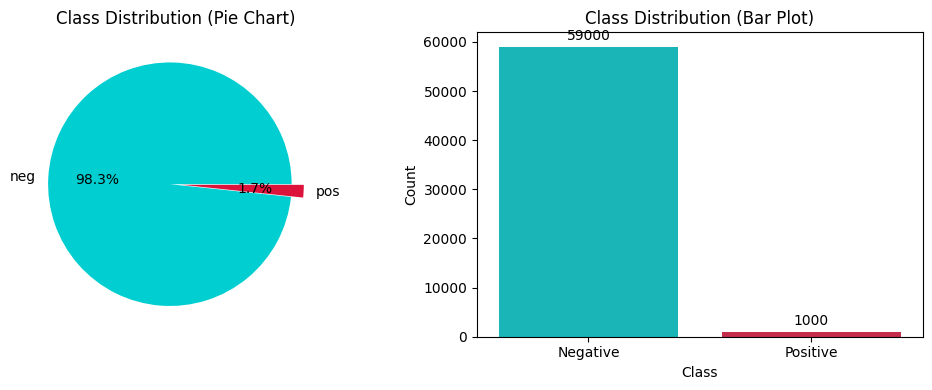

In [65]:
# DISTRIBUTION OF TARGET VARIABLE
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0], explode=[0.05]*df['class'].nunique(), colors=['#00CED1', '#DC143C'])
ax[0].set_ylabel('')  
ax[0].set_title('Class Distribution (Pie Chart)')

sns.countplot(data=df, x='class', ax=ax[1], palette=['#00CED1', '#DC143C'])
ax[1].set_title('Class Distribution (Bar Plot)')
ax[1].set_xlabel('Class')
ax[1].set_xticklabels(['Negative', 'Positive'])
ax[1].set_ylabel('Count')
ax[1].grid(False)

for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                   textcoords='offset points')

plt.tight_layout()
plt.show()

In [293]:
# SPLITTLING THE DATAFRAME
X = df.drop(columns='class', axis=1)
y = df['class']
y = [1 if i == 'pos' else 0 for i in y]
y = pd.Series(y)

In [158]:
X

aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0       76698  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
1       33058  0.000000e+00     NaN     0.0     0.0     0.0     0.0     0.0   
2       41040  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
3          12  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
4       60874  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   
...       ...           ...     ...     ...     ...     ...     ...     ...   
59995  153002  6.640000e+02   186.0     0.0     0.0     0.0     0.0     0.0   
59996    2286  2.130707e+09   224.0     0.0     0.0     0.0     0.0     0.0   
59997     112  2.130706e+09    18.0     0.0     0.0     0.0     0.0     0.0   
59998   80292  2.130706e+09   494.0     0.0     0.0     0.0     0.0     0.0   
59999   40222  6.980000e+02   628.0     0.0     0.0     0.0     0.0     0.0   

       ag_003   ag_004  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0  37250.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0  18254.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0   1648.0  ...   277378.0  159812.0   423992.0   409564.0   
3       318.0   2212.0  ...      240.0      46.0       58.0       44.0   
4         0.0  43752.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...      ...  ...        ...       ...        ...        ...   
59995  2564.0  59100.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0    104.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     28.0  ...      792.0     386.0      452.0      144.0   
59998     0.0    330.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0   1226.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 164 columns]

### CREATING MODEL DICTIONARY, COST EVALUATION AND MODEL EVALUATION FUNCTIONS

In [68]:
# MODELS TO TEST
model_dictionary = {
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
}

In [30]:
# COST EVALUATION FUNCTION
def cost_evaluation(y_true, t_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, t_pred).ravel()
    cost = 10*fp + 500*fn 
    return cost

In [79]:
# MODEL EVALUATION FUNCTION
def model_evaluation(model_name, model_type, pipeline):
    output = []
    output.append(model_name)

    # Preprocessing pipeline
    pre_pipeline = Pipeline([
        ('transformer', pipeline)
    ])

    # Apply the pipeline (imputation and scaling) on the entire dataset before applying ADASYN
    X_transformed = pre_pipeline.fit_transform(X)

    # Apply ADASYN to handle class imbalance
    adasyn = ADASYN(random_state=42)
    X_res, y_res = adasyn.fit_resample(X_transformed, y)

    # Defining train-test split
    Xtrain, Xval, ytrain, yval = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

    # Create the final pipeline with model
    pipeline_to_fit = Pipeline([
        ('model_type', model_type)
    ])

    # Perform cross-validation on the resampled data
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipeline_to_fit, Xtrain, ytrain, cv=kfolds, scoring='f1', n_jobs=-1)
    cv_score = np.nanmean(score)
    output.append(cv_score)

    # Fit the model
    pipeline_to_fit.fit(Xtrain, ytrain)

    # Making predictions
    prediction = pipeline_to_fit.predict(Xval)

    # Calculating recall
    recall = recall_score(yval, prediction)
    output.append(recall)

    # Calculating cost incurred
    cost_incurred = cost_evaluation(yval, prediction)
    output.append(cost_incurred)

    return output

### CREATING TRANSFORMATION CASE SPECIFIC PIPELINES

In [290]:
# KNN IMPUTATION
pipeline_knn = Pipeline([
    ('knn', KNNImputer(n_neighbors=5)),
    ('scale', RobustScaler())
])

# SIMPLE IMPUTATION - MEAN
pipeline_mean = Pipeline([
    ('mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scale', RobustScaler())
])

# SIMPLE IMPUTATION - MEDIAN
pipeline_median = Pipeline([
    ('median', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scale', RobustScaler())
])

# SIMPLE IMPUTATION - MOST FREQUENT
pipeline_mode = Pipeline([
    ('mode', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('scale', RobustScaler())
])

# SIMPLE IMPUTATION - CONSTANT
pipeline_constant = Pipeline([
    ('constant', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scale', RobustScaler())
])


### TESTING ALL THE IMPUTATION STRATEGIES TO IDENTIFY THE CASE WITH BEST RESULTS
1. MISSING VALUES IMPUTATED WITH KNN STRATEGY


In [73]:
result = []
for name, model in model_dictionary.items():
    result.append(model_evaluation(name, model, pipeline_knn))

knn_result = pd.DataFrame(data=result, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
knn_result.set_index('Model', inplace=True)
knn_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
knn_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527

F1 Score    Recall  Total Cost of Misclassification
Model                                                                 
XGBoost            0.996625  0.999485                             3600
Random Forest      0.993658  0.998797                             8110
LightGBM           0.995121  0.998711                             8440
Decision Tree      0.987270  0.994072                            36150
Extra Tree         0.978921  0.990550                            58120
Gradient Boosting  0.980713  0.986254                            82950
Ada Boost          0.969485  0.967784                           190720
SVM                0.604604  0.445189                          3233080

2. MISSING VALUES IMPUTED WITH SIMPLE IMPUTER - MEAN STRATEGY

In [72]:
result_mean = []
for name, model in model_dictionary.items():
    result_mean.append(model_evaluation(name, model, pipeline_mean))

mean_result = pd.DataFrame(data=result_mean, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
mean_result.set_index('Model', inplace=True)
mean_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
mean_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527

F1 Score    Recall  Total Cost of Misclassification
Model                                                                 
XGBoost            0.997449  0.999401                             3980
LightGBM           0.995894  0.998631                             8730
Random Forest      0.994918  0.998288                            10770
Decision Tree      0.989094  0.993581                            39210
Extra Tree         0.984912  0.990671                            57110
Gradient Boosting  0.983425  0.989473                            64090
Ada Boost          0.974019  0.978946                           126010
SVM                0.853859  0.847655                           906240

3. MISSING VALUES IMPUTED WITH SIMPLE IMPUTER - MEDIAN STRATEGY

In [74]:
result_median = []
for name, model in model_dictionary.items():
    result_median.append(model_evaluation(name, model, pipeline_median))

median_result = pd.DataFrame(data=result_median, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
median_result.set_index('Model', inplace=True)
median_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
median_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527

F1 Score    Recall  Total Cost of Misclassification
Model                                                                 
XGBoost            0.997271  0.999316                             4620
Random Forest      0.994657  0.998804                             7900
LightGBM           0.996042  0.998547                             9330
Decision Tree      0.989316  0.993420                            39950
Extra Tree         0.982830  0.990686                            57160
Gradient Boosting  0.980832  0.988550                            69720
Ada Boost          0.970862  0.972657                           163450
SVM                0.522128  0.379048                          3636210

4. MISSING VALUE IMPUTATION USING MICE (MICEFOREST) STRATEGY

In [88]:
# MODEL EVALUATION USING MICE
def imputation_kernel(X, num_datasets=5, num_iterations=5):
    kernel = mf.ImputationKernel(
        X, 
        datasets=num_datasets,  
        save_all_iterations=True, 
        random_state=42
    )
    # Perform MICE imputation for the specified number of iterations
    kernel.mice(num_iterations)
    return kernel

def model_evaluation_MICE(model_name, model_type, pipeline):
    output = []
    output.append(model_name)

    # Perform imputation using ImputationKernel
    kernel = imputation_kernel(X, num_datasets=5, num_iterations=5)

    # Collect results from all imputed datasets
    scores = []
    recalls = []
    costs = []
    
    for i in range(kernel.dataset_count()):
        X_imputed = kernel.complete_data(dataset=i)
        
        # Apply ADASYN to handle class imbalance
        adasyn = ADASYN()
        X_res, y_res = adasyn.fit_resample(X_imputed, y)

        # Define train-test split
        Xtrain, Xval, ytrain, yval = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

        # Create the final pipeline that includes the model
        pipeline_to_fit = Pipeline([
            ('scale', RobustScaler()),  
            ('model_type', model_type)
        ])

        # Perform cross-validation on the resampled data
        kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
        score = cross_val_score(pipeline_to_fit, Xtrain, ytrain, cv=kfolds, scoring='f1', n_jobs=-1)
        cv_score = np.nanmean(score)
        scores.append(cv_score)

        # Fit the model
        pipeline_to_fit.fit(Xtrain, ytrain)

        # Making predictions
        predictions = pipeline_to_fit.predict(Xval)

        # Calculating recall
        recall = recall_score(yval, predictions)
        recalls.append(recall)

        # Calculating cost incurred
        cost_incurred = cost_evaluation(yval, predictions)
        costs.append(cost_incurred)

    # Pooling results across all imputed datasets
    output.append(np.mean(scores))
    output.append(np.mean(recalls))
    output.append(np.mean(costs))

    return output


In [91]:
result_MICE = []
for name, model in model_dictionary.items():
    result_MICE.append(model_evaluation_MICE(name, model, pipeline_mean))

MICE_result = pd.DataFrame(data=result_MICE, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
MICE_result.set_index('Model', inplace=True)
MICE_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)

MICE_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning:

F1 Score    Recall  Total Cost of Misclassification
Model                                                                 
XGBoost            0.997083  0.999230                             5040
LightGBM           0.995209  0.998887                             7200
Random Forest      0.995562  0.998548                             9330
Decision Tree      0.989511  0.993712                            38380
Extra Tree         0.982615  0.992263                            47350
Gradient Boosting  0.982780  0.988124                            71560
Ada Boost          0.970030  0.969515                           180970
SVM                0.694779  0.553837                          2613540

5. MISSING VALUE IMPUTED USING SIMPLE IMPUTER - CONSTANT STARTEGY

In [291]:
result_constant = []
for name, model in model_dictionary.items():
    result_constant.append(model_evaluation(name, model, pipeline_constant))

constant_result = pd.DataFrame(data=result_constant, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
constant_result.set_index('Model', inplace=True)
constant_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
constant_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

F1 Score    Recall  Total Cost of Misclassification
Model                                                                   
XGBoost              0.996721  0.999483                             3750
LightGBM             0.995352  0.999139                             6090
Random Forest        0.994565  0.999053                             6510
Decision Tree        0.989408  0.993196                            40940
Extra Tree           0.983567  0.991559                            51530
Gradient Boosting    0.979679  0.984582                            92570
Ada Boost            0.970502  0.970629                           174380
Logistic Regression  0.723903  0.982257                           193880
SVC                  0.534294  0.386391                          3564710

6. MISSING VALUE IMPUTED USING SIMPLE IMPUTER - MODE STARTEGY

In [295]:
result_mode = []
for name, model in model_dictionary.items():
    result_mode.append(model_evaluation(name, model, pipeline_mode))

mode_result = pd.DataFrame(data=result_mode, columns=['Model', 'F1 Score', 'Recall', 'Total Cost of Misclassification'])
mode_result.set_index('Model', inplace=True)
mode_result.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
mode_result

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

F1 Score    Recall  Total Cost of Misclassification
Model                                                                   
Random Forest        0.994666  0.999657                             2970
XGBoost              0.996927  0.999485                             3630
LightGBM             0.995559  0.999055                             6470
Decision Tree        0.989233  0.993903                            37190
Extra Tree           0.984022  0.989438                            64050
Gradient Boosting    0.980608  0.987378                            76300
Ada Boost            0.969152  0.972008                           166490
Logistic Regression  0.733043  0.981539                           189720
SVC                  0.573199  0.432080                          3310870

### GOING AHEAD WITH KNN STRATEGY

In [296]:
KNN = Pipeline([
    ('knn', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
    ('scale', RobustScaler())
])

KNN_imputed = KNN.fit_transform(X)
KNN_df = pd.DataFrame(KNN_imputed, columns = X.columns)
print(f"Total missing values before imputation: {X.isnull().values.sum()}")
print(f"Total missing values after imputation: {KNN_df.isnull().values.sum()}")


st = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
KNN_X, KNN_y = st.fit_resample(KNN_df, y)
print(f"Before resampling: Target class values: {y.value_counts()}")
print(f"After resampling: Target class values: {KNN_y.value_counts()}")

Total missing values before imputation: 565298
Total missing values after imputation: 0
Before resampling: Target class values: 0    59000
1     1000
Name: count, dtype: int64
After resampling: Target class values: 0    58878
1    58878
Name: count, dtype: int64


### TRYING DIFFERENT FEATURE SELECTION STRATEGIES 

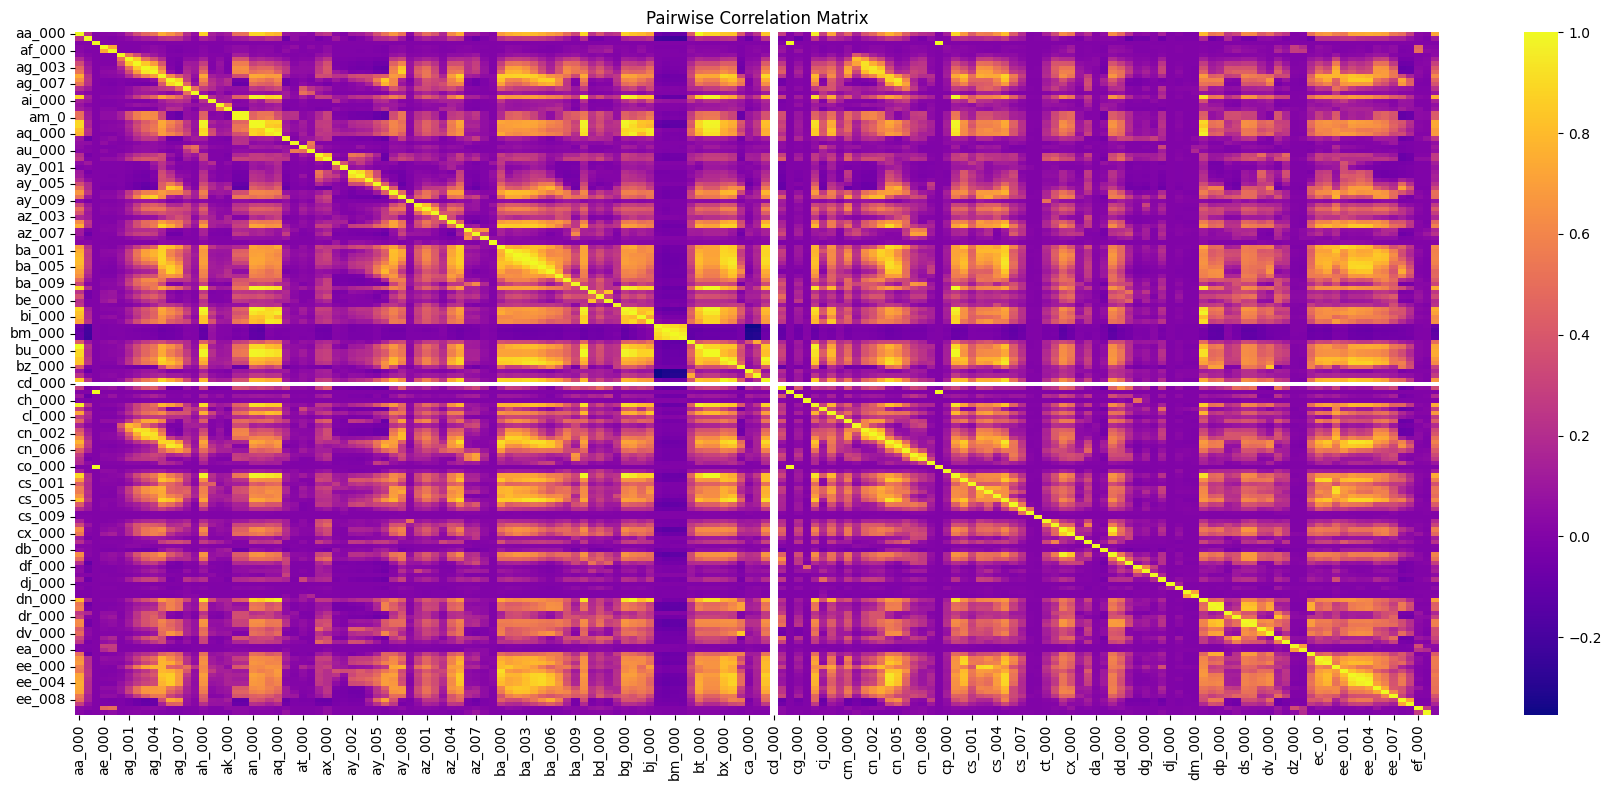

In [298]:
# CORRELATION MATRIX
corr = KNN_X.corrwith(KNN_y)
correlation = KNN_X.corr()
correlation['target'] = corr 

fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.heatmap(correlation, annot=False, cmap='plasma')
ax.set_title('Pairwise Correlation Matrix')
plt.tight_layout()
plt.show()

1. VARIANCE THRESHOLD

In [299]:
# FILTER METHODS FOR BASIC FEATURE SELECTION
variance_threshold = VarianceThreshold(threshold=0.1)
variance_threshold_selected = variance_threshold.fit_transform(KNN_X)
variance_threshold_df = pd.DataFrame(variance_threshold_selected, columns = KNN_X.columns[variance_threshold.get_support(indices=True)])

print(f"Shape after applying variance threshold: {variance_threshold_df.shape}")

Shape after applying variance threshold: (117756, 162)


2. CORRELATION MATRIX

In [300]:
corr_matrix = variance_threshold_df.corr().abs()
high_correlation = np.where(corr_matrix > 0.7)

high_correlation_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                          for i, j in zip(*high_correlation) 
                          if i != j and i < j]

if not high_correlation_pairs:
    print(f"There are no pairs above the mentioned threshold of 0.7")
else:
    for feature1, feature2 in high_correlation_pairs:
        print(f"{feature1} and {feature2} are highly correlated with a correlation of {round(corr_matrix.loc[feature1, feature2], 2)}")

aa_000 and ag_005 are highly correlated with a correlation of 0.74
aa_000 and ah_000 are highly correlated with a correlation of 0.88
aa_000 and an_000 are highly correlated with a correlation of 0.89
aa_000 and ao_000 are highly correlated with a correlation of 0.89
aa_000 and ap_000 are highly correlated with a correlation of 0.81
aa_000 and aq_000 are highly correlated with a correlation of 0.77
aa_000 and az_005 are highly correlated with a correlation of 0.75
aa_000 and ba_001 are highly correlated with a correlation of 0.76
aa_000 and ba_002 are highly correlated with a correlation of 0.79
aa_000 and ba_003 are highly correlated with a correlation of 0.81
aa_000 and ba_004 are highly correlated with a correlation of 0.8
aa_000 and ba_005 are highly correlated with a correlation of 0.76
aa_000 and bb_000 are highly correlated with a correlation of 0.89
aa_000 and bg_000 are highly correlated with a correlation of 0.88
aa_000 and bh_000 are highly correlated with a correlation of 0

In [301]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(variance_threshold_df, KNN_y)
feature_importances = forest.feature_importances_
feature_importance_df = pd.DataFrame(data = feature_importances, index=variance_threshold_df.columns, columns=['Feature Importance'])
feature_importance_df.sort_values(by='Feature Importance', ascending=False, inplace=True)
feature_importance_df.head(10)

Feature Importance
aa_000            0.092564
ci_000            0.078531
bj_000            0.069492
bt_000            0.068642
bb_000            0.051467
dn_000            0.040129
bu_000            0.033699
an_000            0.033329
bi_000            0.030166
bv_000            0.029897

In [302]:
print(f"Data frame shape: {variance_threshold_df.shape}")
features_to_drop = [feature2 for _, feature2 in high_correlation_pairs]
variance_threshold_df.drop(columns=features_to_drop, inplace=True)
print(f"Data frame shape after dropping one of the highly correlated features: {variance_threshold_df.shape}")


Data frame shape: (117756, 162)
Data frame shape after dropping one of the highly correlated features: (117756, 76)


In [303]:
# robust_scaler = RobustScaler()
# vt_df_transformed = robust_scaler.fit_transform(vt_df)
# robust_scaler.set_output(transform='pandas')

In [304]:
# df_scaled = pd.DataFrame(vt_df_transformed, columns = vt_df.columns)
# df_scaled.head()

3. RECURSIVE FEATURE ELIMINATION (RFE)

In [305]:
rfe = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=5, scoring='f1', n_jobs=-1)
rfe.fit(variance_threshold_df, KNN_y)
selected_features = variance_threshold_df.columns[rfe.support_]
recursive_feature_df = variance_threshold_df[selected_features]
print(f"Dataframe shape after RFE: {recursive_feature_df.shape}")

Dataframe shape after RFE: (117756, 58)


### APPLYING PCA

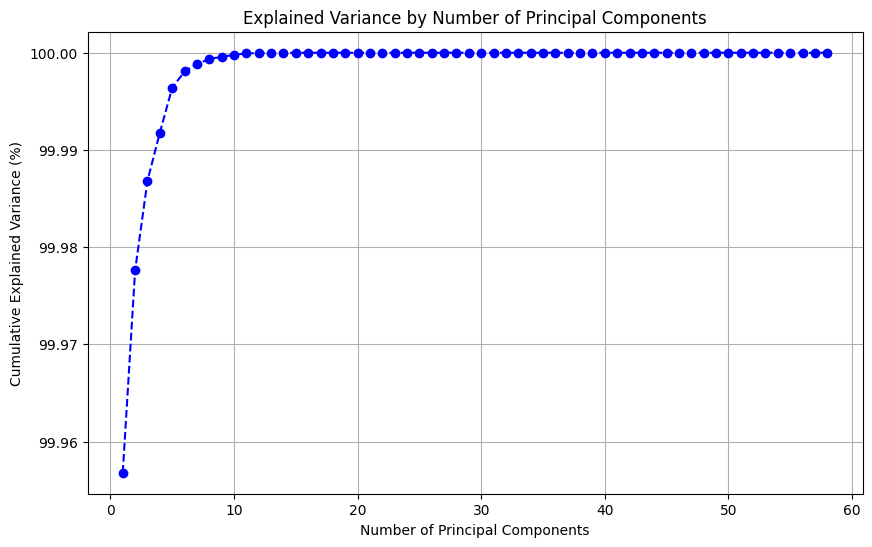

In [306]:
pca_trial = PCA()
X_trial = pca_trial.fit_transform(recursive_feature_df)

explained_variance = np.cumsum(pca_trial.explained_variance_ratio_) * 100

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

In [307]:
n_components = np.argmax(explained_variance>=95) + 1
print(f"Number of components required to explain 95% variance: {n_components}")

Number of components required to explain 95% variance: 1


In [308]:
final_n_components = np.argmax(explained_variance>=95) + 15
print("Selected number of components:", final_n_components)

Selected number of components: 15


In [309]:
pca_final = PCA(n_components=final_n_components)
X_final = pca_final.fit_transform(recursive_feature_df)

# Interpreting the variance contributed to each principal component by the original features
loadings = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)
loadings_df = pd.DataFrame(data=loadings, index=recursive_feature_df.columns, columns=[f"PC {i+1}" for i in range(final_n_components)])
loadings_df

PC 1          PC 2          PC 3          PC 4          PC 5  \
aa_000  2.172256e+00  2.486156e+00  1.272441e+00  1.320357e-02 -4.556979e-01   
ac_000  8.270917e+04  1.357544e+04 -5.747334e+04  4.890809e+03  8.970125e+03   
ad_000 -3.624343e+01 -6.483766e+01 -5.072783e+01 -1.930266e+01  7.706847e+00   
ae_000  8.084335e+00 -1.819287e+00  7.230400e+00 -6.242657e-01 -1.299338e+00   
ag_001  1.037190e+04  2.024237e+04  2.986414e+03 -1.520263e+03 -1.160129e+03   
ag_006  1.378419e-01 -6.116162e-02 -9.983819e-02  2.694552e-01  1.428319e-02   
ag_008  5.953617e-01  4.898626e+00 -4.648497e-01  3.923183e-02 -1.740773e-01   
ai_000  4.082265e+03 -5.805904e+02 -2.512640e+03  2.691252e+04  1.644168e+04   
aj_000  2.005935e+01  3.787980e+03 -1.679436e+03 -2.178516e+02 -1.138304e+02   
al_000  5.220233e+02  4.311185e+02  1.989606e+02 -2.967369e+01 -5.876147e+01   
at_000 -6.350439e+03  1.642997e+05 -2.801915e+04  1.345101e+03 -2.073014e+02   
av_000  2.643074e+00  3.138204e+00  2.198012e+00  3.904658e-01  1.863084e+00   
ay_001  1.954740e+04 -1.895598e+04 -7.997692e+04  2.253190e+06 -4.605365e+04   
ay_005 -4.144413e+00 -8.367754e+00 -6.129858e+00 -5.947019e-01  7.864808e-01   
ay_007  1.846576e+00  2.286131e+00  9.277342e-01 -8.308781e-02 -2.926561e-01   
ay_009  3.262136e+03  6.318551e+03  1.532750e+04 -5.113712e+02 -8.705771e+02   
az_000  1.123068e+01  1.655944e+01  3.230743e+00 -9.735074e-03 -5.401871e-01   
az_003  6.839593e-01  1.191781e+00  4.068937e-01  2.497318e+00 -3.330075e-01   
az_006  5.143267e+01  3.372084e+01  4.702951e+01 -2.831541e+00 -1.277482e+01   
az_007  6.039215e+04  1.247339e+05  1.208734e+05 -1.543955e+04 -3.207789e+04   
az_008  1.886724e+03  2.940748e+03  3.801697e+03 -1.005228e+02 -8.621132e+02   
ba_008  1.041799e+02  6.012783e+01  4.800635e+01 -7.931145e+00 -8.672679e+00   
ba_009  3.107105e+03  2.184215e+03  3.597999e+03 -2.690653e+02 -8.157452e+02   
bc_000  1.870880e+01  1.069861e+01  2.256344e+01 -8.685407e-01 -2.160725e+00   
bd_000  1.001201e+01  3.496803e+00  7.702856e+00  3.892001e-01 -2.186968e+00   
bf_000  1.269981e+01  2.929569e+00  1.558658e+01  1.555845e-01 -3.709878e+00   
bk_000  1.060204e-02 -1.404517e-02 -5.508992e-02 -4.842534e-03  3.492318e-02   
bs_000  1.847305e-01  2.257375e-01  1.236287e-01  5.202284e-02  6.054593e-02   
bz_000 -9.637139e-01 -6.349578e+00  1.156663e+00  1.109568e+00 -5.986943e-01   
ca_000  2.539592e-02  4.231568e-02  5.618018e-02  1.511954e-02  5.860732e-03   
ce_000  1.103086e+00  9.749933e-01  1.498175e+00 -1.109538e-01 -3.851826e-01   
cg_000  7.585520e-01  3.854957e-01  1.040815e+00  4.075893e-03 -2.483607e-01   
cj_000  3.898693e+05  4.485014e+06 -4.615220e+05 -1.223678e+03 -8.234825e+04   
cl_000  5.178122e+02  4.689361e+02  9.868481e+01  4.348078e+00 -2.907264e+01   
cn_009  2.280978e+01  2.518871e+00  7.430770e+01 -2.318139e+01 -2.601283e+01   
cp_000  3.031522e+01  6.533288e+00  1.655770e+01  7.387333e-01 -5.427765e+00   
cs_001  1.702256e+00  2.297062e-01  5.276678e-01  1.515756e+00 -6.990489e-02   
cs_006  4.035661e-01  6.680406e-02  3.759896e-01  4.264724e-01 -1.292207e-01   
cs_007  4.841805e-01  2.038520e-01  3.766255e-01  3.418602e-01 -5.059283e-02   
cs_008  9.275538e-02 -3.046367e-02  3.777245e-01  1.317562e+00 -1.800096e-01   
cs_009 -6.990756e+01 -1.176382e+02 -8.771624e+01 -1.586602e+01  2.563065e+01   
ct_000  7.117908e-01  6.285015e-01  2.117408e-01  1.599859e-01  1.247160e-01   
cu_000  3.361379e+00  1.674847e+00  4.673250e-01  4.202782e-01  3.337408e-01   
cv_000  1.357266e+00  7.672960e-01  7.692754e-01  5.749755e-03 -1.506307e-01   
cy_000  1.302458e+02  2.358738e+02  1.410901e+03  2.100290e+01 -4.376215e+02   
cz_000  2.049426e+00 -1.334705e-01 -5.080646e-01  1.004155e+00  2.386141e-01   
da_000  2.117553e+00 -1.220876e+00 -1.534785e+00 -3.179294e-01 -2.593007e-03   
db_000 -5.962653e-02 -1.007170e-01 -5.051768e-02  3.915447e-02  8.036147e-03   
dd_000  2.445897e+00  2.362461e+00  2.267995e+00  6.217057e-01  5.586518e-02   
de_000  9.540491

In [310]:
for i in range(final_n_components):
    print(f'\nTop features contributing to PC {i+1}:')
    top_features = loadings_df[f'PC {i+1}'].abs().sort_values(ascending=False).head(10)
    print(top_features)


Top features contributing to PC 1:
dq_000    3.200670e+08
dr_000    2.144321e+06
cj_000    3.898693e+05
ac_000    8.270917e+04
az_007    6.039215e+04
di_000    5.129648e+04
dh_000    4.683170e+04
ay_001    1.954740e+04
ag_001    1.037190e+04
dg_000    7.920096e+03
Name: PC 1, dtype: float64

Top features contributing to PC 2:
cj_000    4.485014e+06
di_000    8.900084e+05
dr_000    5.788827e+05
at_000    1.642997e+05
dh_000    1.556641e+05
dg_000    1.492142e+05
az_007    1.247339e+05
ag_001    2.024237e+04
ay_001    1.895598e+04
ac_000    1.357544e+04
Name: PC 2, dtype: float64

Top features contributing to PC 3:
dr_000    2.984340e+06
dh_000    4.657145e+05
cj_000    4.615220e+05
di_000    2.754855e+05
az_007    1.208734e+05
dg_000    8.781209e+04
ay_001    7.997692e+04
ac_000    5.747334e+04
at_000    2.801915e+04
dq_000    1.954574e+04
Name: PC 3, dtype: float64

Top features contributing to PC 4:
ay_001    2.253190e+06
dh_000    5.585520e+04
dr_000    5.107680e+04
ai_000    2.6912

In [311]:
model_dictionary = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree': ExtraTreeClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
}


def baseline_model(model_name, model_type, X, y):
    output = []
    output.append(model_name)

    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    score = cross_val_score(model_type, X, y, cv=kfolds, scoring='recall', n_jobs=-1) 
    final_score = np.mean(score)
    output.append(final_score)

    train_X, validation_X, train_y, validation_y = train_test_split(X, y, test_size=0.2, random_state=42)

    model_type.fit(train_X, train_y)
    y_pred = model_type.predict(validation_X)
    score2 = roc_auc_score(validation_y, y_pred)
    output.append(score2)

    try:
        cost_incurred = cost_evaluation(validation_y, y_pred)
    except Exception as e:
        print(f"Error calculating cost for {model_name}: {e}")
        cost_incurred = np.nan  
    output.append(cost_incurred)

    return output

### COMPUTING MODEL PERFORMANCE AFTER FEATURE SELECTION AND PCA

In [312]:
PCA_model_results = []
for model_name, model in model_dictionary.items():
    PCA_model_results.append(baseline_model(model_name, model, X_final, KNN_y))

PCA_results_df = pd.DataFrame(PCA_model_results, columns=['Model', 'Recall Score', 'ROC AUC Score', 'Total Cost of Misclassification'])
PCA_results_df.set_index('Model', inplace=True)
PCA_results_df.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
PCA_results_df

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Recall Score  ROC AUC Score  \
Model                                              
Random Forest            0.990452       0.983772   
XGBoost                  0.980672       0.974693   
Decision Tree            0.979495       0.975816   
Extra Tree               0.974649       0.967980   
LightGBM                 0.969491       0.962631   
Gradient Boosting        0.937003       0.933486   
Ada Boost                0.908183       0.912207   
Logistic Regression      0.512322       0.750149   
SVC                      0.419495       0.689917   

                     Total Cost of Misclassification  
Model                                                 
Random Forest                                  69000  
XGBoost                                       116710  
Decision Tree                                 129180  
Extra Tree                                    160430  
LightGBM                                      191580  
Gradient Boosting                             380230  
Ada Boost                                     548400  
Logistic Regression                          2816190  
SVC                                          3443780

### COMPUTING MODEL PERFORMANCE AFTER FEATURE SELECTION BUT BEFORE PCA

In [313]:
RFE_model_results = []
for model_name, model in model_dictionary.items():
    RFE_model_results.append(baseline_model(model_name, model, recursive_feature_df, KNN_y))
RFE_results_df = pd.DataFrame(RFE_model_results, columns=['Model', 'Recall Score', 'ROC AUC Score', 'Total Cost of Misclassification'])
RFE_results_df.set_index('Model', inplace=True)
RFE_results_df.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
RFE_results_df


/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Recall Score  ROC AUC Score  \
Model                                              
XGBoost                  0.998862       0.996827   
LightGBM                 0.997944       0.995048   
Random Forest            0.998539       0.995045   
Decision Tree            0.993804       0.989658   
Extra Tree               0.990338       0.981874   
Gradient Boosting        0.985430       0.980742   
Ada Boost                0.975903       0.975555   
Logistic Regression      0.887563       0.552807   
SVC                      0.418474       0.689532   

                     Total Cost of Misclassification  
Model                                                 
XGBoost                                         9080  
LightGBM                                       16360  
Random Forest                                  19300  
Decision Tree                                  46540  
Extra Tree                                     69450  
Gradient Boosting                              99600  
Ada Boost                                     136590  
Logistic Regression                           768830  
SVC                                          3448280

### COMPUTING MODEL PERFORMANCE WITH FEATURES UPTO RFE

In [314]:
CORR_model_results = []
for model_name, model in model_dictionary.items():
    CORR_model_results.append(baseline_model(model_name, model, variance_threshold_df, KNN_y))
CORR_results_df = pd.DataFrame(CORR_model_results, columns=['Model', 'Recall Score', 'ROC AUC Score', 'Total Cost of Misclassification'])
CORR_results_df.set_index('Model', inplace=True)
CORR_results_df.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
CORR_results_df

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Recall Score  ROC AUC Score  \
Model                                              
XGBoost                  0.998862       0.996913   
Random Forest            0.998573       0.994792   
LightGBM                 0.997877       0.994496   
Decision Tree            0.993529       0.988941   
Extra Tree               0.990473       0.983226   
Gradient Boosting        0.985495       0.980742   
Ada Boost                0.976635       0.974831   
Logistic Regression      0.896435       0.571555   
SVC                      0.463560       0.713733   

                     Total Cost of Misclassification  
Model                                                 
XGBoost                                         7590  
Random Forest                                  19360  
LightGBM                                       19920  
Decision Tree                                  46710  
Extra Tree                                     66680  
Gradient Boosting                              99110  
Ada Boost                                     142640  
Logistic Regression                           708050  
SVC                                          3163320

### APPLYING PCA DIRECTLY WITHOUT ANY FEATURE SELECTION TECHNIQUES

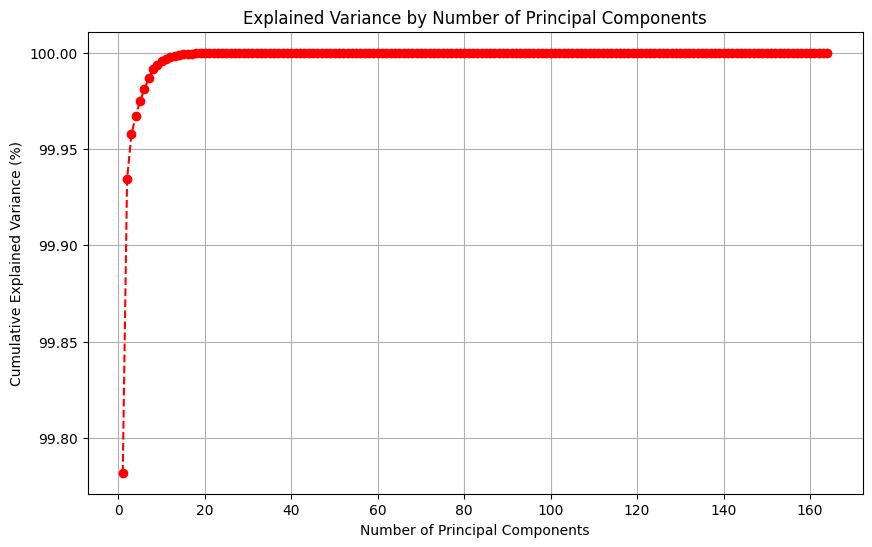

In [315]:
direct_pca_trial = PCA()
X_direct_trial = direct_pca_trial.fit_transform(KNN_X)

directPCA_exp_variance = np.cumsum(direct_pca_trial.explained_variance_ratio_) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(range(1, len(directPCA_exp_variance) + 1), directPCA_exp_variance, marker='o', linestyle='--', color='r')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance (%)')
ax.set_title('Explained Variance by Number of Principal Components')
ax.grid(True)


In [317]:
# SELECTING TOP 20 COMPONENTS
direct_pca_final = PCA(n_components=18)
X_direct_final = direct_pca_final.fit_transform(KNN_X)

X_direct_final_df = pd.DataFrame(X_direct_final, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
X_direct_final_df

PC1           PC2           PC3           PC4           PC5  \
0      -5.716909e+07 -36670.156235 -1.760106e+06 -7.402827e+05 -6.651379e+05   
1      -5.716947e+07 -36568.623573 -1.765274e+06 -7.175174e+05 -6.638679e+05   
2      -5.716947e+07 -36569.302691 -1.765275e+06 -7.175178e+05 -6.638678e+05   
3      -5.716745e+07 -36568.520841 -1.765049e+06 -7.170295e+05 -6.638082e+05   
4      -5.716947e+07 -36571.698891 -1.766295e+06 -7.206569e+05 -6.448355e+05   
...              ...           ...           ...           ...           ...   
117751 -5.716122e+07 -37951.935807 -1.802855e+06 -1.717047e+06  5.850890e+06   
117752 -5.716919e+07 -36640.006532 -1.758802e+06 -7.306972e+05 -6.636338e+05   
117753  5.901765e+05 -43812.766367  1.234129e+07  7.180178e+06  1.711959e+06   
117754  2.799456e+07 -39046.928955  2.205396e+06  1.142653e+07  1.968168e+06   
117755 -5.716919e+07 -36675.125415 -1.762961e+06 -7.396581e+05 -6.372755e+05   

                 PC6           PC7           PC8           PC9          PC10  \
0      -2.695799e+05 -1.500543e+05  6.472897e+04 -3.777652e+04 -7.554339e+04   
1      -2.927226e+05 -1.681940e+05  5.745572e+04 -8.272086e+04 -1.539870e+04   
2      -2.927232e+05 -1.681941e+05  5.745579e+04 -8.272080e+04 -1.539935e+04   
3      -2.924732e+05 -1.681429e+05  5.738639e+04 -8.273145e+04 -1.524521e+04   
4      -2.893089e+05 -1.774793e+05  5.739401e+04 -8.475099e+04 -1.578240e+04   
...              ...           ...           ...           ...           ...   
117751  2.100581e+05  5.627047e+06  1.085308e+05  1.073605e+07 -2.995226e+04   
117752 -2.707101e+05 -1.532985e+05  6.330120e+04 -4.909078e+04 -5.592654e+04   
117753 -4.137269e+06 -6.513674e+05 -7.652281e+05  2.210719e+04  7.352996e+06   
117754 -4.255359e+06 -6.178704e+05 -2.405113e+06 -1.263107e+04 -1.704768e+06   
117755 -2.859530e+05 -1.100515e+05  8.151935e+04  5.137165e+04 -5.587135e+04   

                 PC11           PC12           PC13          PC14  \
0        -3128.716944  -54437.410661 -183795.018695 -3.815019e+04   
1       -78603.301448  -30093.134127  -72975.918709 -6.101984e+03   
2       -78603.230291  -30093.724473  -72981.166603 -6.098795e+03   
3       -78617.164062  -29930.702007  -71595.998530 -6.930919e+03   
4       -42752.262455  -29864.153408  -72229.807396 -6.008259e+03   
...               ...            ...            ...           ...   
117751  185480.548363    -103.802503  -15182.825954 -9.122143e+03   
117752  -27226.146842  -46592.443002 -147849.486546 -2.762617e+04   
117753   98823.815402 -120254.415703 -159054.745763  1.491627e+06   
117754  -45023.647996   29216.579580  182153.278510  1.121961e+06   
117755  -11187.904741  -55105.468511 -168079.800397 -3.824566e+04   

                 PC15          PC16          PC17          PC18  
0      -570446.983593  9.061966e+05 -2.824398e+05 -2.680644e+05  
1       187998.702357 -2.398720e+05  4.850981e+04 -1.061347e+03  
2       187998.540447 -2.398726e+05  4.850954e+04 -1.062646e+03  
3       187951.743456 -2.397772e+05  4.854372e+04 -1.073412e+03  
4       189135.927050 -2.414957e+05  4.785837e+04 -6.244771e+02  
...               ...           ...           ...           ...  
117751 -179860.489251 -5.425540e+04 -2.407164e+05 -6.039280e+05  
117752 -325420.165980  5.395470e+05 -1.694325e+05 -9.332696e+04  
117753  215311.285165  3.427652e+04 -1.021531e+06 -3.540807e+04  
117754   63467.417662 -3.906574e+04  9.342382e+04 -3.055825e+04  
117755 -469194.700059  1.009853e+06 -9.622095e+04  2.249927e+06  

[117756 rows x 18 columns]

In [318]:
direct_PCA_model_results = []
for model_name, model in model_dictionary.items():
    direct_PCA_model_results.append(baseline_model(model_name, model, X_direct_final_df, KNN_y))
PCAdirect_results_df = pd.DataFrame(direct_PCA_model_results, columns=['Model', 'Recall Score', 'ROC AUC Score', 'Total Cost of Misclassification'])
PCAdirect_results_df.set_index('Model', inplace=True)
PCAdirect_results_df.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
PCAdirect_results_df

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Recall Score  ROC AUC Score  \
Model                                              
Random Forest            0.993408       0.987169   
XGBoost                  0.987109       0.980455   
Decision Tree            0.983314       0.979058   
Extra Tree               0.981023       0.975364   
LightGBM                 0.978182       0.970758   
Gradient Boosting        0.942881       0.941114   
Ada Boost                0.921733       0.919742   
Logistic Regression      0.568319       0.776791   
SVC                      0.563545       0.767688   

                     Total Cost of Misclassification  
Model                                                 
Random Forest                                  48110  
XGBoost                                        92810  
Decision Tree                                  97550  
Extra Tree                                    119490  
LightGBM                                      128910  
Gradient Boosting                             347070  
Ada Boost                                     451580  
Logistic Regression                          2534570  
SVC                                          2567590

### FINAL MODEL WITH MODE IMPUTATION AND NO DIMENSIONALITY REDUCTION

In [319]:
MODE = Pipeline([
    ('Mode', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('scale', RobustScaler())
])

MODE_imputed = MODE.fit_transform(X)
MODE_df = pd.DataFrame(MODE_imputed, columns = X.columns)
print(f"Total missing values before imputation: {X.isnull().values.sum()}")
print(f"Total missing values after imputation: {MODE_df.isnull().values.sum()}")


st = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
MODE_X, MODE_y = st.fit_resample(MODE_df, y)
print(f"Before resampling: Target class values: {y.value_counts()}")
print(f"After resampling: Target class values: {MODE_y.value_counts()}")

Total missing values before imputation: 565298
Total missing values after imputation: 0
Before resampling: Target class values: 0    59000
1     1000
Name: count, dtype: int64
After resampling: Target class values: 0    58835
1    58835
Name: count, dtype: int64


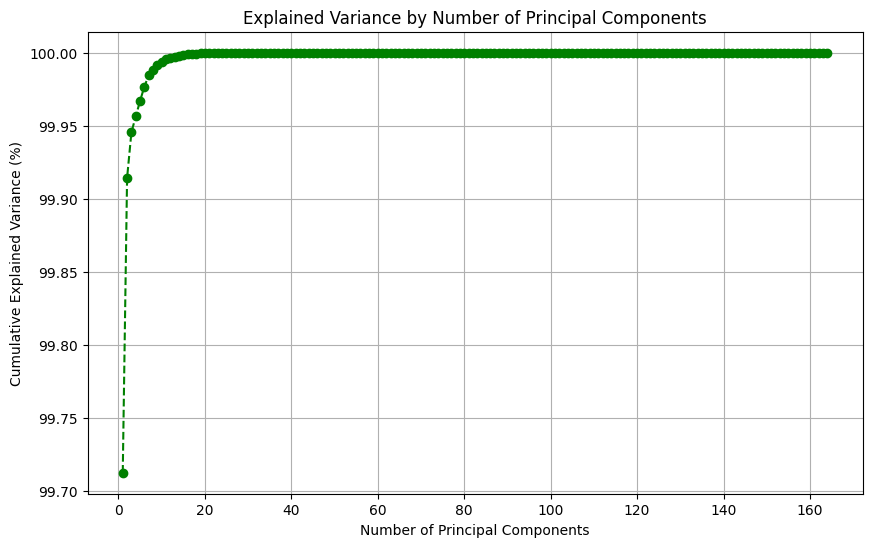

In [321]:
MODE_pca_trial = PCA()
X_MODE_pca_trial = MODE_pca_trial.fit_transform(MODE_X)

MODEPCA_exp_variance = np.cumsum(MODE_pca_trial.explained_variance_ratio_) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(range(1, len(MODEPCA_exp_variance) + 1), MODEPCA_exp_variance, marker='o', linestyle='--', color='green')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance (%)')
ax.set_title('Explained Variance by Number of Principal Components')
ax.grid(True)

In [324]:
# SELECTING TOP 18 COMPONENTS
MODE_pca_final = PCA(n_components=18)
MODE_X_final = MODE_pca_final.fit_transform(MODE_X)

X_MODE_final_df = pd.DataFrame(MODE_X_final, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
X_MODE_final_df

PC1           PC2           PC3           PC4           PC5  \
0      -3.488604e+07 -36284.870484 -1.812148e+06 -3.413282e+05 -4.617502e+05   
1      -3.488596e+07 -36027.563427 -1.797363e+06 -3.356174e+05 -4.589383e+05   
2      -3.488596e+07 -36027.560618 -1.797364e+06 -3.356178e+05 -4.589382e+05   
3      -3.488394e+07 -36026.777795 -1.797147e+06 -3.351624e+05 -4.588555e+05   
4      -3.488620e+07 -36154.658359 -1.837485e+06 -3.552979e+05 -4.870101e+05   
...              ...           ...           ...           ...           ...   
117665 -3.487815e+07 -37566.023467 -1.773584e+06 -4.131008e+06  3.719154e+06   
117666 -3.488580e+07 -36137.227478 -1.771642e+06 -3.217879e+05 -4.436645e+05   
117667  2.286104e+07 -42975.675595  1.122591e+07  6.823193e+06  7.284973e+06   
117668  5.027604e+07 -38253.155632  1.391473e+06  1.016500e+07  7.812217e+06   
117669 -3.488586e+07 -36150.521397 -1.783368e+06 -3.496404e+05 -4.215614e+05   

                 PC6           PC7           PC8           PC9          PC10  \
0      -8.648038e+05 -1.161235e+05  3.021136e+04 -6.434639e+04 -4.825702e+04   
1      -8.405663e+05 -1.099984e+05  3.089385e+04 -5.597583e+04 -4.797066e+04   
2      -8.405668e+05 -1.099984e+05  3.089387e+04 -5.597578e+04 -4.797182e+04   
3      -8.402285e+05 -1.099868e+05  3.085339e+04 -5.598771e+04 -4.769549e+04   
4      -9.047777e+05 -1.207678e+05  3.656997e+04 -6.843549e+04 -6.639552e+04   
...              ...           ...           ...           ...           ...   
117665  3.988756e+06  5.983116e+06  3.298795e+04  1.003697e+07  2.192027e+04   
117666 -7.981227e+05 -1.042714e+05  2.642721e+04 -4.956761e+04 -3.353857e+04   
117667 -1.440125e+06 -9.660848e+04  1.044164e+06  4.310135e+04  7.472901e+06   
117668  3.780549e+05 -1.679136e+04 -1.530110e+06 -2.647598e+03 -1.818177e+06   
117669 -7.962655e+05 -5.127048e+04  4.474019e+04  5.273882e+04 -3.858986e+04   

                 PC11          PC12          PC13          PC14          PC15  \
0       -92911.235958 -2.357028e+05 -19380.863713 -3.220250e+05  2.105717e+06   
1       -67909.277529 -9.224440e+04 -20484.990162  4.345031e+02 -2.162087e+05   
2       -67909.261971 -9.225045e+04 -20485.142116  4.364249e+02 -2.162086e+05   
3       -67915.554483 -9.073393e+04 -20444.314915 -7.321701e+01 -2.161136e+05   
4      -115284.800399 -3.061286e+05 -37603.174656 -3.512629e+05  2.248744e+06   
...               ...           ...           ...           ...           ...   
117665  142602.914695  2.411841e+04   2057.414456  1.299784e+04 -6.481003e+04   
117666  -49226.384401 -3.683424e+04  -6057.502353  2.390459e+04 -3.326764e+05   
117667   44460.154536 -1.218308e+06 -86990.106455  1.405789e+06  2.133836e+05   
117668  -26383.307260 -1.805160e+05 -98228.290963  1.177525e+06  1.051744e+05   
117669  -40418.976336 -5.355330e+04 -11715.191961  1.630354e+04 -4.016116e+05   

                 PC16           PC17           PC18  
0      -157335.288532 -782732.951910 -388161.431890  
1       110142.592147  435604.038098  197948.152867  
2       110142.122212  435604.463901  197947.980344  
3       110186.885210  435670.964703  198039.106269  
4       -51863.730357   69311.848185   66066.061506  
...               ...            ...            ...  
117665 -123563.125890   60053.135564 -232146.811661  
117666   22860.041768 -256286.286099 -164709.746989  
117667 -136970.223450  408264.380326 -809514.644502  
117668  -53632.170571 -117728.167248   29854.353814  
117669   66197.412495 -591329.646056 -142437.143300  

[117670 rows x 18 columns]

In [325]:
MODE_PCA_model_results = []
for model_name, model in model_dictionary.items():
    MODE_PCA_model_results.append(baseline_model(model_name, model, X_MODE_final_df, MODE_y))
PCAMODE_results_df = pd.DataFrame(MODE_PCA_model_results, columns=['Model', 'Recall Score', 'ROC AUC Score', 'Total Cost of Misclassification'])
PCAMODE_results_df.set_index('Model', inplace=True)
PCAMODE_results_df.sort_values(by='Total Cost of Misclassification', ascending=True, inplace=True)
PCAMODE_results_df

/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddhant/Desktop/Sensors/AirPressureSensors/myvenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Recall Score  ROC AUC Score  \
Model                                              
Random Forest            0.984650       0.978506   
XGBoost                  0.975315       0.969750   
Decision Tree            0.976513       0.972148   
LightGBM                 0.971372       0.958855   
Extra Tree               0.972314       0.967612   
Gradient Boosting        0.944733       0.933937   
Ada Boost                0.925679       0.913971   
Logistic Regression      0.900194       0.870246   
SVC                      0.579651       0.770282   

                     Total Cost of Misclassification  
Model                                                 
Random Forest                                  92780  
XGBoost                                       147270  
Decision Tree                                 150130  
LightGBM                                      164060  
Extra Tree                                    169330  
Gradient Boosting                             325250  
Ada Boost                                     409830  
Logistic Regression                           610750  
SVC                                          2516910

In [326]:
# Custom scorer
scorer = make_scorer(f1_score, average='macro')

# Split data into training and validation sets
train_X, validation_X, train_y, validation_y = train_test_split(MODE_X, MODE_y, test_size=0.2, random_state=42)

# 1. Bayesian Optimization for XGBoost
xgb_search_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10)
}

xgb_optimizer = BayesSearchCV(
    estimator=XGBClassifier(),
    search_spaces=xgb_search_space,
    n_iter=32,  
    scoring=scorer,
    cv=5,  
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_optimizer.fit(train_X, train_y)
best_xgb_model = xgb_optimizer.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [331]:
# Custom scorer
scorer1 = make_scorer(f1_score, average='macro')

# Split data into training and validation sets
train_X1, validation_X1, train_y1, validation_y1 = train_test_split(KNN_X, KNN_y, test_size=0.2, random_state=42)

# 1. Bayesian Optimization for XGBoost
xgb_search_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10)
}

xgb_optimizer = BayesSearchCV(
    estimator=XGBClassifier(),
    search_spaces=xgb_search_space,
    n_iter=32,  
    scoring=scorer,
    cv=5,  
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_optimizer.fit(train_X1, train_y1)
best_xgb_model1 = xgb_optimizer.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [332]:
# Output the best parameters and score for each model
print("MODE Imputation:Best XGBoost Model: ", best_xgb_model)
print("KNN Imputation:Best XGBoost Model: ", best_xgb_model1)

MODE Imputation:Best XGBoost Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9905182959682264, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15638510662242536, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=415, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
KNN Imputation:Best XGBoost Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
            

In [334]:
best_xgb_model.fit(MODE_X, MODE_y)
prediciton = best_xgb_model.predict(validation_X)

misclassification_cost = cost_evaluation(validation_y, prediciton)
print("MODE Imputation: Best XGBoost Model Cost of Misclassification: ", misclassification_cost)

MODE Imputation: Best XGBoost Model Cost of Misclassification:  500


In [337]:
best_xgb_model1.fit(KNN_X, KNN_y)
prediction_knn = best_xgb_model1.predict(validation_X1)

misclassification_cost_knn = cost_evaluation(validation_y1, prediction_knn)
print("KNN Imputation: Best XGBoost Model Cost of Misclassification: ", misclassification_cost_knn)

KNN Imputation: Best XGBoost Model Cost of Misclassification:  0


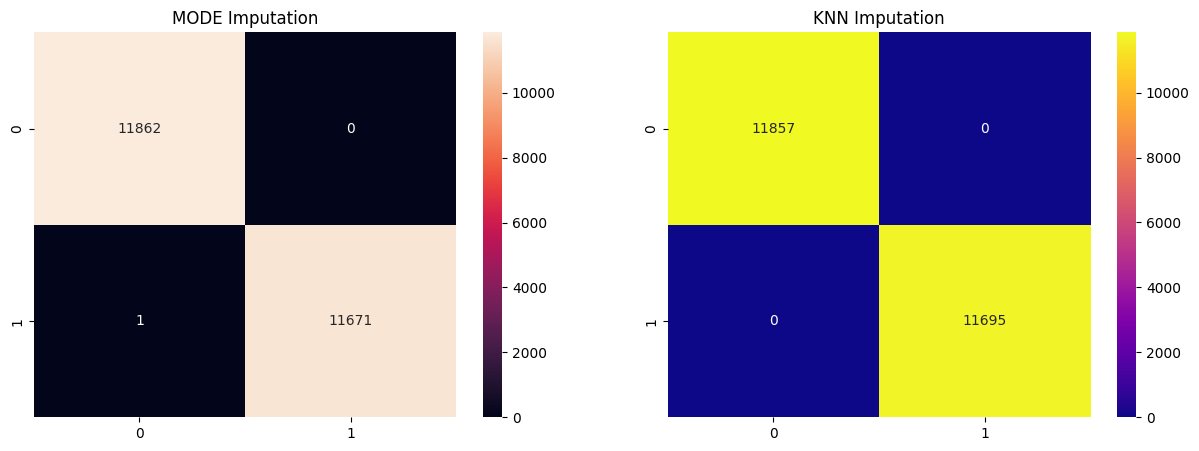

In [405]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(confusion_matrix(validation_y, prediciton), annot=True, ax=ax[0], fmt='d')
sns.heatmap(confusion_matrix(validation_y1, prediction_knn), annot=True, ax=ax[1], fmt='d', cmap="plasma")
ax[0].set_title('MODE Imputation')
ax[1].set_title('KNN Imputation')

plt.show()

### TESTING THE MODELS ON UNSEEN DATA

In [340]:
df_test = pd.read_csv('/Users/siddhant/Desktop/Sensors/archive/aps_failure_test_set.csv',na_values='na')

In [341]:
df_test.head()

class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [342]:
test_categorical = df_test.select_dtypes(include='object').columns
test_numerical = df_test.select_dtypes(exclude='object').columns

In [345]:
Xtest = df_test[test_numerical]

In [355]:
Ytest = df_test['class']
Ytest = Ytest.replace({'neg': 0, 'pos': 1})

In [347]:
Xtest = Xtest.reindex(columns=X.columns)

1. MODE STARTEGY MODEL

In [349]:
MODE_imputed_test = MODE.transform(Xtest)
MODE_testDF = pd.DataFrame(MODE_imputed_test, columns = Xtest.columns)
print(f"Total missing values before imputation: {Xtest.isnull().values.sum()}")
print(f"Total missing values after imputation: {MODE_testDF.isnull().values.sum()}")

Total missing values before imputation: 152747
Total missing values after imputation: 0


In [356]:
test_prediction = best_xgb_model.predict(MODE_testDF)

test_misclassification_cost = cost_evaluation(Ytest, test_prediction)
print("MODE Imputation: Best XGBoost Model Cost of Misclassification: ", test_misclassification_cost)

MODE Imputation: Best XGBoost Model Cost of Misclassification:  32450


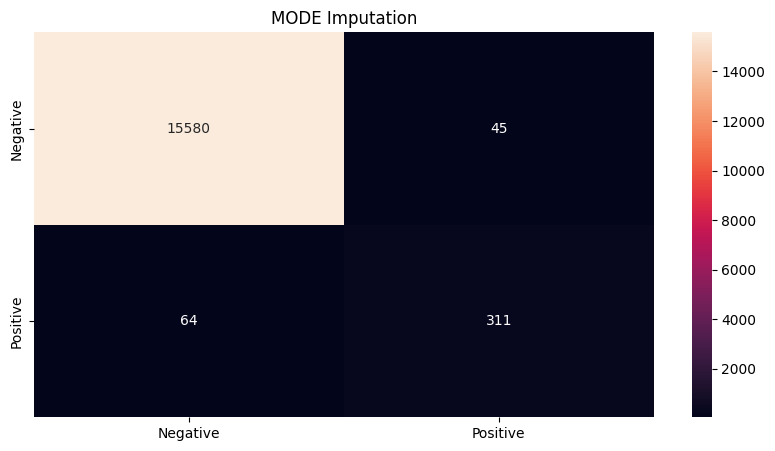

In [365]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, test_prediction), annot=True, fmt='d')
ax.set_title('MODE Imputation')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

plt.show()

In [385]:
print(f"MODE Stategy Recall Score: {recall_score(Ytest, test_prediction)}")

MODE Stategy Recall Score: 0.8293333333333334


2. KNN STRATEGY

In [ ]:
KNN_imputed_test = KNN.transform(Xtest)
KNN_testDF = pd.DataFrame(KNN_imputed_test, columns = Xtest.columns)
print(f"Total missing values before imputation: {Xtest.isnull().values.sum()}")
print(f"Total missing values after imputation: {KNN_testDF.isnull().values.sum()}")

In [ ]:
test_prediction1 = best_xgb_model1.predict(KNN_testDF)

test_misclassification_cost1 = cost_evaluation(Ytest, test_prediction1)
print("KNN Imputation: Best XGBoost Model Cost of Misclassification: ", test_misclassification_cost1)

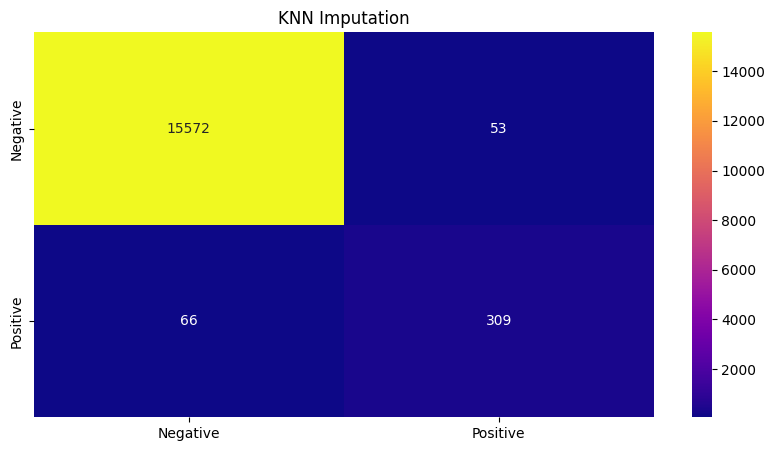

In [404]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, test_prediction1), annot=True, fmt='d', cmap="plasma")
ax.set_title('KNN Imputation')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

plt.show()

In [387]:
print(f"KNN Stategy Recall Score: {recall_score(Ytest, test_prediction1)}")

KNN Stategy Recall Score: 0.824


### APPLYING COST SENSITIVE LEARNING AND CUSTOM THRESHOLDING

In [381]:
scale_position_weight = y.value_counts()[0] / y.value_counts()[1]

# Custom scorer
scorer_mode = make_scorer(recall_score, average='macro')

# Split data into training and validation sets
mode_train_X, mode_validation_X, mode_train_y, mode_validation_y = train_test_split(MODE_X, MODE_y, test_size=0.2, random_state=42)

# 1. Bayesian Optimization for XGBoost
xgb_search_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10)
}

xgb_optimizer_mode = BayesSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_position_weight),
    search_spaces=xgb_search_space,
    n_iter=32,  
    scoring=scorer_mode,
    cv=5,  
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

xgb_optimizer_mode.fit(mode_train_X, mode_train_y)
mode_best_xgb_model = xgb_optimizer_mode.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [396]:
threshold = 0.3

In [397]:
y_probs = mode_best_xgb_model.predict_proba(MODE_testDF)[:,1]

test_prediction_MODE = (y_probs > threshold).astype(int)

test_misclassification_cost_MODE = cost_evaluation(Ytest, test_prediction_MODE)
print(f"MODE Imputation Cost Sensitive Learning Recall Score: {recall_score(Ytest, test_prediction_MODE)}")
print(f"MODE Imputation: Cost of Misclassification: {test_misclassification_cost_MODE}")

MODE Imputation Cost Sensitive Learning Recall Score: 0.8853333333333333
MODE Imputation: Cost of Misclassification: 22840


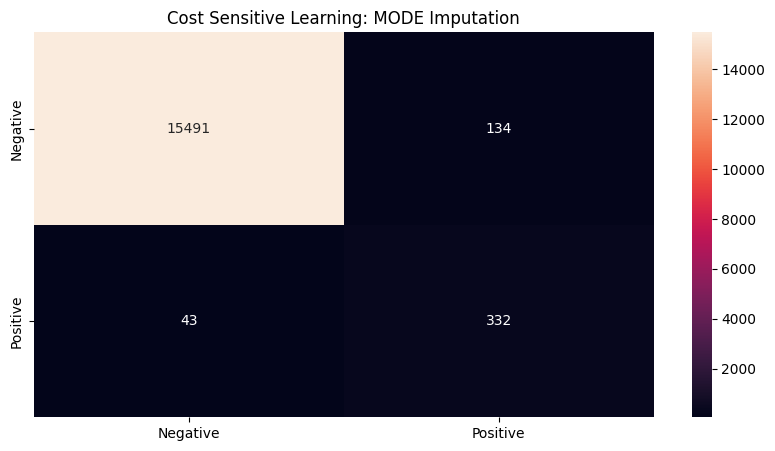

In [398]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, test_prediction_MODE), annot=True, fmt='d')
ax.set_title('Cost Sensitive Learning: MODE Imputation')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

plt.show()

In [382]:
# Custom scorer
scorer_KNN = make_scorer(recall_score, average='macro')

# Split data into training and validation sets
train_X1_KNN, validation_X1_KNN, train_y1_KNN, validation_y1_KNN = train_test_split(KNN_X, KNN_y, test_size=0.2, random_state=42)

# 1. Bayesian Optimization for XGBoost
xgb_search_space_KNN = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'min_child_weight': Integer(1, 10)
}

xgb_optimizer_KNN = BayesSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_position_weight),
    search_spaces=xgb_search_space_KNN,
    n_iter=32,  
    scoring=scorer_KNN,
    cv=5,  
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_optimizer_KNN.fit(train_X1_KNN, train_y1_KNN)
best_xgb_model_KNN = xgb_optimizer_KNN.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [399]:
y_probs1 = best_xgb_model_KNN.predict_proba(KNN_testDF)[:,1]

test_prediction_KNN = (y_probs1 > threshold).astype(int)

test_misclassification_cost_KNN = cost_evaluation(Ytest, test_prediction_KNN)
print(f"KNN Imputation Cost Sensitive Learning Recall Score: {recall_score(Ytest, test_prediction_KNN)}")
print(f"KNN Imputation: Cost of Misclassification: {test_misclassification_cost_KNN}")

KNN Imputation Cost Sensitive Learning Recall Score: 0.8746666666666667
KNN Imputation: Cost of Misclassification: 24630


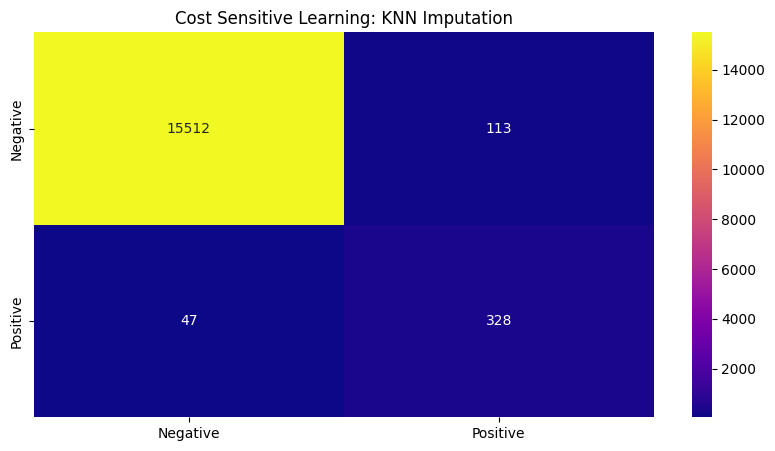

In [403]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, test_prediction_KNN), annot=True, fmt='d', cmap='plasma')
ax.set_title('Cost Sensitive Learning: KNN Imputation')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])

plt.show()

In [406]:
cost_df = pd.DataFrame({'MODE strategy': [test_misclassification_cost_MODE], 'KNN strategy': [test_misclassification_cost_KNN]})
cost_df

MODE strategy  KNN strategy
0          22840         24630